# **Business Understanding**

**Contents**

* Business Understanding
* Data Understanding
* Prepare Data
* Modeling
* Evaluation

# **1. Business Understanding**
The data contains information of various games released over last 40 years from 1984 across various platforms and genres from various publishers.
The analysis project answers the following questions:
1. Which Genre has become most popular - Completed
2. Which Platform has revieved most popularity - Completed
3. A Time-Series Analysis of the Global Sales Trend of last 40 years - Completed
4. Publishers with most Global Sales along with which country offers the maximum of these sales - Completed

# **2. Data Understanding**
In this chapter of the analysis, we will load in the data and then trim and clean the dataset for analysis.

In [20]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

In [25]:
import pandas as pd

# Correct path to your CSV file
game = pd.read_csv("data/video_data.csv")



In [26]:
#checking the column where the amount of data missing is maximum
missing_percent = game.isnull().mean()

missing_values = pd.DataFrame({'column_name': game.columns,
                                 'percent_missing_values': missing_percent})

missing_values.sort_values(by=['percent_missing_values'], ascending=False).head()

,column_name,percent_missing_values
critic_score,critic_score,0.895682
jp_sales,jp_sales,0.894933
na_sales,na_sales,0.802596
pal_sales,pal_sales,0.799675
other_sales,other_sales,0.763684


In [28]:
#dropping the 6 columns
game = game.drop(['critic_score', 'jp_sales', 'na_sales', 'pal_sales', 'other_sales'], axis=1)

In [29]:
game.head()

,img,title,console,genre,publisher,developer,total_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,20.32,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,19.39,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,16.15,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,15.86,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,15.09,2015-11-06,2018-01-14


# **3. Data Preparation**
In this chapter we discover that there are still columns and rows with some values missing so we go ahead to clean and trim further to make the dataset completely workable 

In [30]:
#checking which coulmns have NaN values across the dataset
game.isna().any()

img             False
title           False
console         False
genre           False
publisher       False
developer        True
total_sales      True
release_date     True
last_update      True
dtype: bool

Though here the "Publisher" column showcases 0 NaN values. The fact is that the real data set does have 54 missing values in the column. But since it is an important column for my analysis question, instead of dropping it, I researched and appended the information to my local dataset. Thus, eleminationg its missing values.

In [32]:
#checking count of NaN values in the column
count = game["developer"].isna().sum()

print(count)

17


As we can see "Year of Release" has over 269 missing values. Unfortunately these are alot of values to be researched in a day. Hence, These particluar rows were dropped.

In [36]:
##checking count of NaN values in the column
count = game["total_sales"].isna().sum()

print(count)

45081


In [34]:
#dropping the partcular rows with the NaN values with respect to the column
game = game[pd.notnull(game['developer'])]

Similarly, for "Genre" the 2 rows with the missing values were dropped.

In [37]:
count = game["total_sales"].isna().sum()

print(count)

45081


In [38]:
game = game[pd.notnull(game['total_sales'])]

In [39]:
game = game[pd.notnull(game['release_date'])]

In [40]:
game = game[pd.notnull(game['last_update'])] 

In [41]:
game.isna().any()

img             False
title           False
console         False
genre           False
publisher       False
developer       False
total_sales     False
release_date    False
last_update     False
dtype: bool

In [43]:
game.head()

,img,title,console,genre,publisher,developer,total_sales,release_date,last_update
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,19.39,2014-11-18,2018-01-03
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,15.09,2015-11-06,2018-01-14
7,/games/boxart/full_4653215AmericaFrontccc.jpg,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,13.94,2018-10-26,2018-11-02
8,/games/boxart/full_1977964AmericaFrontccc.jpg,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,13.86,2012-11-13,2018-04-07
9,/games/boxart/full_4649679AmericaFrontccc.png,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,13.80,2012-11-13,2018-04-07


# **4. Modeling**
We then build different visualising models to analysse the data to answer the  questions.

In [44]:
#Defining a graph plotting function
def plot_func(x, y, x_title=None, y_title=None):
    plt.bar(x,y)
    plt.xlabel(x_title)
    plt.ylabel(y_title)

# **A) Which Platform has been the most popular to play games on? - Completed**

,total_sales
console,
PS4,824
XOne,480
PS3,447
PSV,427
3DS,424


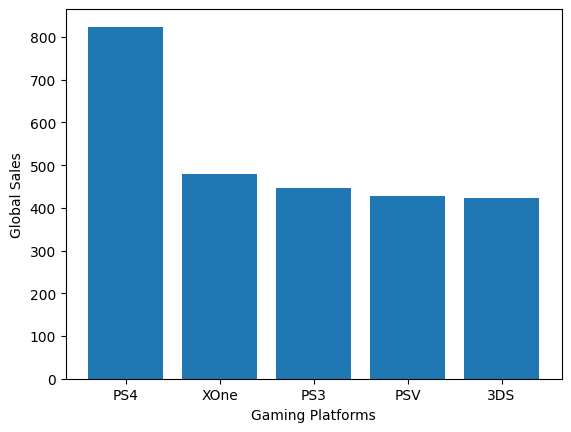

In [48]:
sales_platform = game.groupby(by='console').count()['total_sales'].sort_values(ascending=False)

sales_platform = sales_platform.to_frame()

sales_platform.head(5)

sales_height =  sales_platform.index.tolist()

plot_func.figsize=(10,10)

plot_func(sales_height[:5], sales_platform.iloc[:5].total_sales.values.tolist(), x_title="Gaming Platforms", y_title="Global Sales")

sales_platform.head(5)

# **B) Which Genre has become most popular - Completed**

,total_sales
genre,
Action,663
Role-Playing,436
Sports,394
Adventure,309
Shooter,299


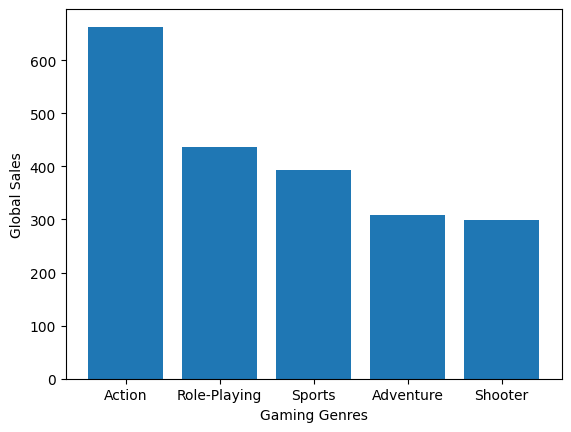

In [49]:
sales_genre = game.groupby(by='genre').count()['total_sales'].sort_values(ascending=False)

sales_genre = sales_genre.to_frame()

sales_height =  sales_genre.index.tolist()

plot_func(sales_height[:5], sales_genre.iloc[:5].total_sales.values.tolist(), x_title="Gaming Genres", y_title="Global Sales")

sales_genre.head(5)

# **C) A Time-Series Analysis of the Global Sales Trend of last 40 years - Completed**

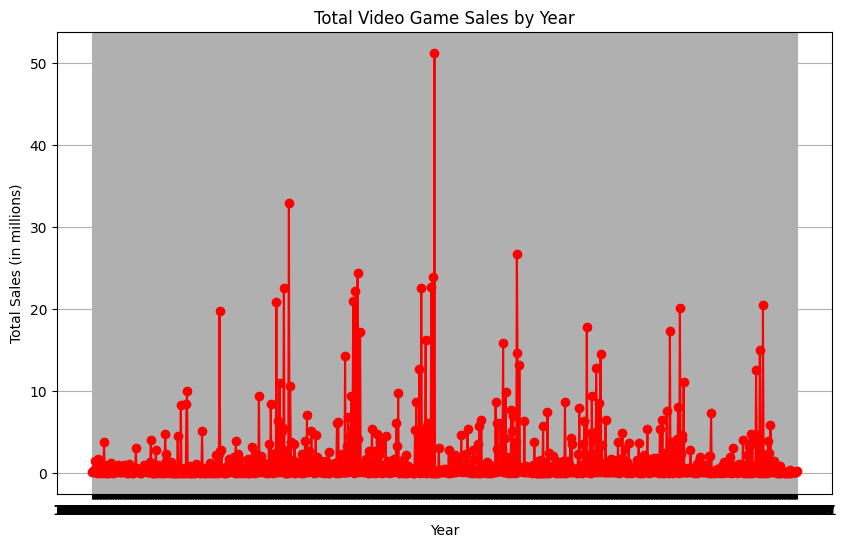

In [51]:
plt.figure(figsize=(10,6))
plt.plot(sales_year, color='red', marker='o')
plt.title("Total Video Game Sales by Year")
plt.xlabel("Year")
plt.ylabel("Total Sales (in millions)")
plt.grid(True)
plt.show()

<Axes: title={'center': 'Game Sales Trend with Rolling Average'}, xlabel='release_date'>

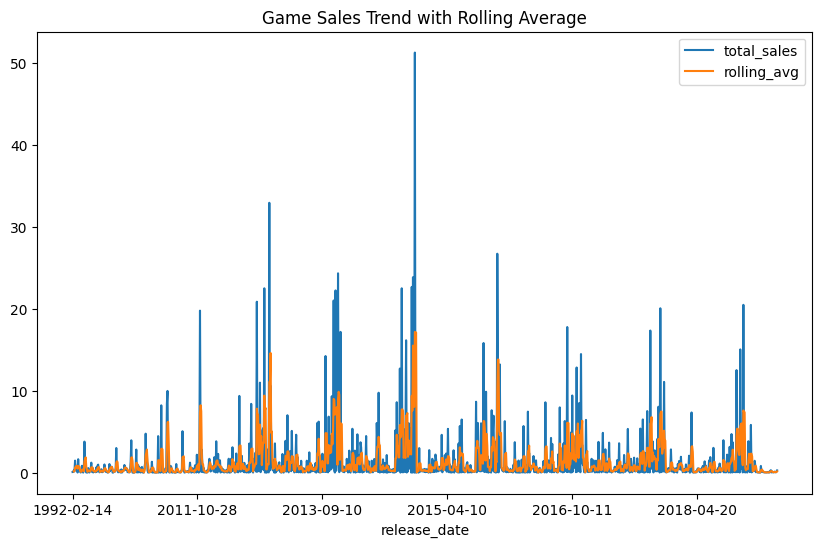

In [52]:
sales_year['rolling_avg'] = sales_year['total_sales'].rolling(window=3).mean()

sales_year.plot(figsize=(10,6), title="Game Sales Trend with Rolling Average")


# **D) Publishers with most Global Sales 

,total_sales
publisher,
Namco Bandai Games,265
Ubisoft,217
Activision,196
Warner Bros. Interactive Entertainment,149
Tecmo Koei,143


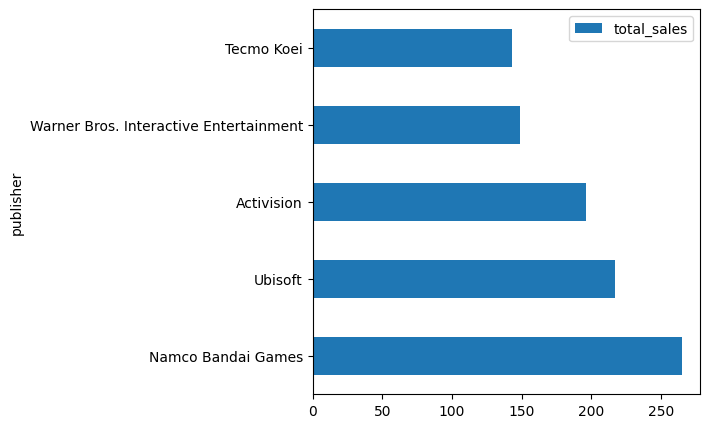

In [53]:
sales_publisher = game.groupby(by='publisher').count()['total_sales'].sort_values(ascending=False)

sales_publisher = sales_publisher.to_frame()

sales_publisher.iloc[:5].plot.barh(figsize=(5,5))

sales_publisher.head(5)

# **5. Evaluation**
A) Most selling gaming Platform is Sony's PS4(824 Million games sold), followed by XONE, Sony's PS3

B) The most selling gaming genre is Action (663 Million games sold), second is Role-Playing, then comes sports,  and finally adventure.

C) The Time-Series Analysis showcases that till 1995 the video game sales were up and down. Then there was a steady rise in sales with fewer variations in the trend. Then in 2000, the sales picked up even more and the decade of the 2010s saw a sharp and huge rise in video games sales volume. From there, there was a sharp fall in revenue till 2015. From there the sales have been slow but picking up.

D)The publisher with the most games sold is Namco Bandai Games, followed by Ubisoft then comes Activision, Warner Bros. Interactive Entertainment and lastly, Tecmo Koei.




# **Conclusion**
There are many ways one can conduct further analytics on the gaming industry. Comparing different Sales Regions or even Experimenting to find various different attributes affecting the sales of the games. In fact, additional work can be done on the dataset itself regarding the missing values in the customer and critic scores for each game for more in-depth analysis.